In [28]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/Downloads/Log In - AgInjuryNews (1).xlsx - Sheet1 (1) - Log In - AgInjuryNews (1).xlsx - Sheet1 (1).csv')
X = pd.DataFrame(dataset.iloc[:,:18].values)
Y = pd.DataFrame(dataset.iloc[:,18:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
X_train, X_train_val, Y_train, Y_train_val = train_test_split(X,Y,test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.reshape(2735,18,1)
X_test.reshape(684,18,1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

features = pd.DataFrame(dataset.iloc[:,:18])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0      3   2   2  25   0   3  10   0   0   0   0   0   0   0   0   0   1   1
1      3   3   1  61   0   3  10   0   0   0   0   0   0   0   0   0   7   1
2      3   3   1  65   0   3  10   0   0   0   0   0   0   0   0   0   6   1
3      3   2   1  49   0   3  10   0   0   0   1   0   0   0   0   0   5   1
4      3   1   1  54   0   5   2   1   1   0   0   0   0   0   0   1   5   1
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
3414   1   2   1  57   0   6   7   0   0   0   0   0   0   0   0   0   1   4
3415   1   1   1  24   0   3   7   0   0   0   0   0   0   0   0   0   1   4
3416   1   1   1  50   0   3  10   0   0   0   0   0   0   0   0   0   6   4
3417   1   2   1  58   0   3   9   0   0   0   0   0   0   0   0   0   6   4
3418   1   2   1   3   0   4  10   0   0   0   0   0   0   0   0   0   5   4

[3419 rows x 18 columns]
      0
0     0
1     1
2     1
3     0
4     1
..

In [29]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SimpleRNN, Input, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras import layers

In [30]:
def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Multi-Head Attention layer
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attention_output = Dropout(dropout)(attention_output)
    attention_output = Add()([attention_output, inputs])
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)

    # Feed Forward Network
    ff_output = Dense(ff_dim, activation="relu")(attention_output)
    ff_output = Dropout(dropout)(ff_output)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    return Add()([ff_output, attention_output])

# Build the model
inputs = Input(shape=(18, 1))
x = transformer_block(inputs, head_size=64, num_heads=4, ff_dim=64, dropout=0.1)
x = transformer_block(x, head_size=64, num_heads=4, ff_dim=64, dropout=0.1)

# Flatten and Dense layers
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer (binary classification)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/1000
69/69 - 7s - loss: 0.6563 - accuracy: 0.6399 - val_loss: 0.6695 - val_accuracy: 0.6088 - 7s/epoch - 95ms/step
Epoch 2/1000
69/69 - 1s - loss: 0.6519 - accuracy: 0.6444 - val_loss: 0.6716 - val_accuracy: 0.6088 - 956ms/epoch - 14ms/step
Epoch 3/1000
69/69 - 1s - loss: 0.6511 - accuracy: 0.6444 - val_loss: 0.6741 - val_accuracy: 0.6088 - 1s/epoch - 15ms/step
Epoch 4/1000
69/69 - 1s - loss: 0.6517 - accuracy: 0.6444 - val_loss: 0.6825 - val_accuracy: 0.6088 - 1s/epoch - 15ms/step
Epoch 5/1000
69/69 - 1s - loss: 0.6525 - accuracy: 0.6444 - val_loss: 0.6695 - val_accuracy: 0.6088 - 1s/epoch - 15ms/step
Epoch 6/1000
69/69 - 1s - loss: 0.6523 - accuracy: 0.6444 - val_loss: 0.6780 - val_accuracy: 0.6088 - 1s/epoch - 15ms/step
Epoch 7/1000
69/69 - 1s - loss: 0.6523 - accuracy: 0.6444 - val_loss: 0.6708 - val_accuracy: 0.6088 - 1s/epoch - 16ms/step
Epoch 8/1000
69/69 - 1s - loss: 0.6522 - accuracy: 0.6444 - val_loss: 0.6806 - val_accuracy: 0.6088 - 1s/epoch - 15ms/step
Epoch 9/1000


In [31]:
res = model.predict(X_test)
res.round()
actual = []
for num in res:
    if num>0.5:
        actual.append(1)
    else:
        actual.append(0)
from sklearn.metrics import classification_report
print(classification_report(Y_test,actual,digits=6))

22/22 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       255
           1   0.627193  1.000000  0.770889       429

    accuracy                       0.627193       684
   macro avg   0.313596  0.500000  0.385445       684
weighted avg   0.393371  0.627193  0.483496       684



c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

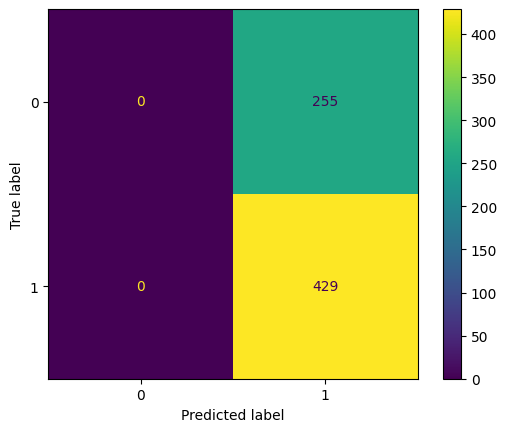

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, actual)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()